In [1]:
using Turing

In [12]:
@model function gdemo(xs) 
    # priors 
    σ² ~ InverseGamma(2 , 3)
    μ ~ Normal(0 , σ²)

    # likelihood
    for i in eachindex(xs)
        xs[i] ~ Normal(μ , σ²)
    end
end

gdemo (generic function with 2 methods)

In [13]:
# use μ=15, σ = 2.2
data = rand(Normal(15, 2.2), 30)

# Construct a model with our data
model = gdemo(data)

DynamicPPL.Model{typeof(gdemo), (:xs,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(gdemo, (xs = [18.790766069355577, 12.568975945459295, 11.694851951378384, 13.079490067768743, 15.351285153651537, 13.999233572680449, 16.03440236713636, 10.324216157584344, 14.080183914014311, 11.882424271328608  …  15.561916508372105, 17.480941457845333, 18.059541851602134, 16.625865082942585, 16.112147145587024, 19.22049366597749, 15.064711016388026, 17.802396901838897, 14.04137338969971, 16.420741830998978],), NamedTuple(), DynamicPPL.DefaultContext())

In [16]:
chain = sample(
    model, 
    NUTS(), 
    500 # Number of samples
)

┌ Info: Found initial step size
└   ϵ = 0.0125


Chains MCMC chain (500×14×1 Array{Float64, 3}):

Iterations        = 251:1:750
Number of chains  = 1
Samples per chain = 500
Wall duration     = 1.43 seconds
Compute duration  = 1.43 seconds
parameters        = σ², μ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          σ²    3.8473    0.5278    0.0283   412.0334   250.0420    1.0041     ⋯
           μ   14.7946    0.6507    0.0299   476.1705   382.4154    1.0014     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          σ² 

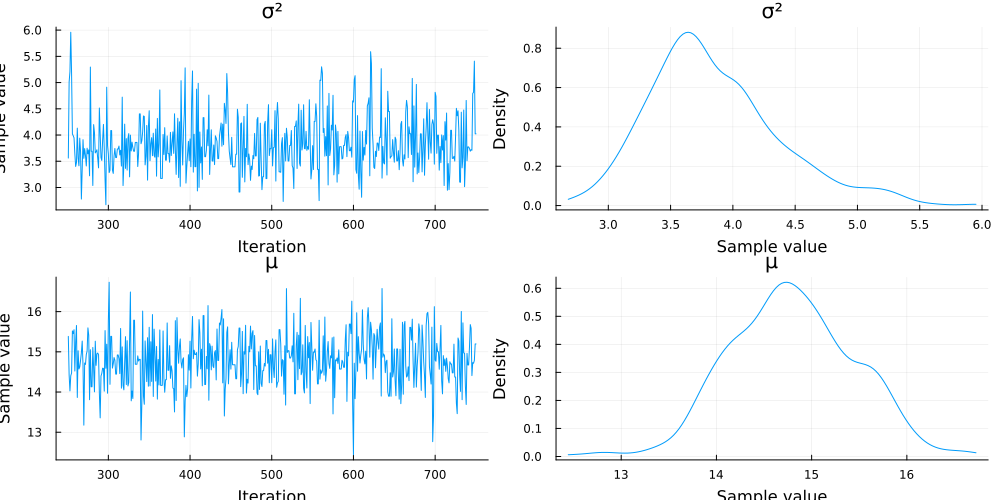

In [17]:
using StatsPlots
plot(chain)